# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

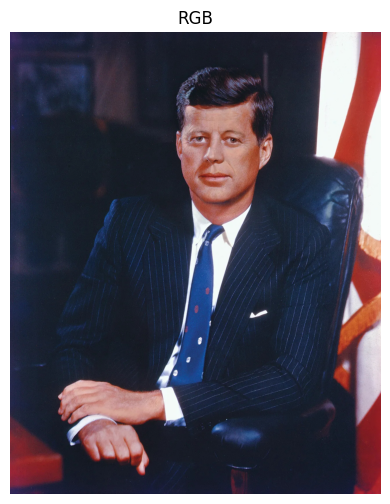

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_bgr = cv2.imread("John-F-Kennedy.jpeg")
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("RGB")
plt.axis("off")
plt.show()



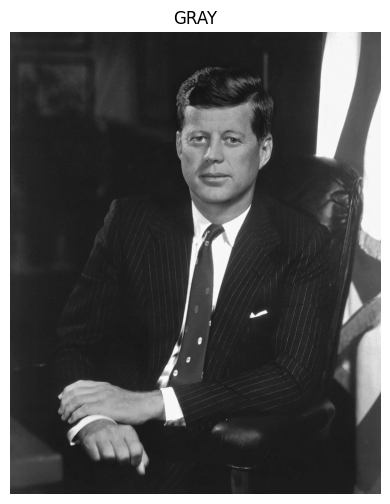

In [2]:
R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]
gray = 0.299 * R + 0.587 * G + 0.114 * B
gray = gray.astype(np.uint8)
#gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray,cmap='gray')
plt.title("GRAY")
plt.axis("off")
plt.show()



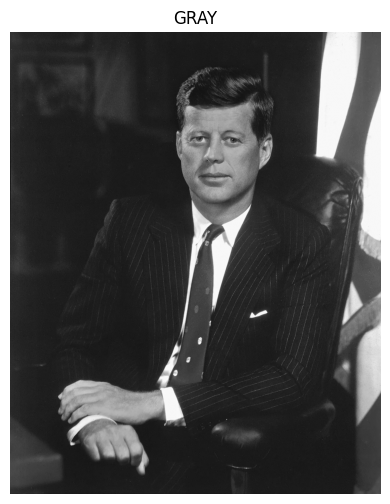

In [3]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray,cmap='gray')
plt.title("GRAY")
plt.axis("off")
plt.show()

In [4]:
print("RGB shape:", img_rgb.shape)
print("Gray shape:", gray.shape)


RGB shape: (1600, 1284, 3)
Gray shape: (1600, 1284)


In [5]:
h, w = gray.shape

print("RGB pixel at (0,0):", img_rgb[0, 0])
print("Gray pixel at (0,0):", gray[0, 0])

print("RGB pixel at center:", img_rgb[h//2, w//2])
print("Gray pixel at center:", gray[h//2, w//2])

print("RGB pixel at (100,100):", img_rgb[100, 100])
print("Gray pixel at (100,100):", gray[100, 100])


RGB pixel at (0,0): [53 39 92]
Gray pixel at (0,0): 49
RGB pixel at center: [181 186 224]
Gray pixel at center: 189
RGB pixel at (100,100): [29 34 56]
Gray pixel at (100,100): 35


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [6]:
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

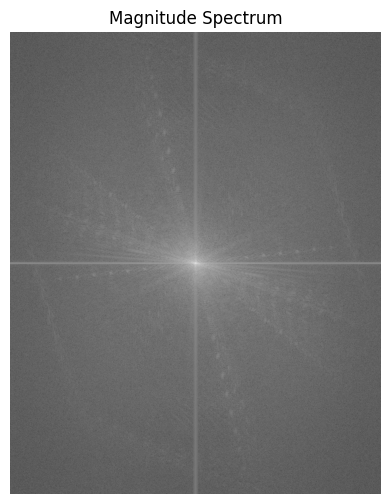

In [7]:
magnitude_spectrum = 20 * np.log(np.abs(fshift))
phase_spectrum = np.angle(fshift)
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1283.5), np.float64(1599.5), np.float64(-0.5))

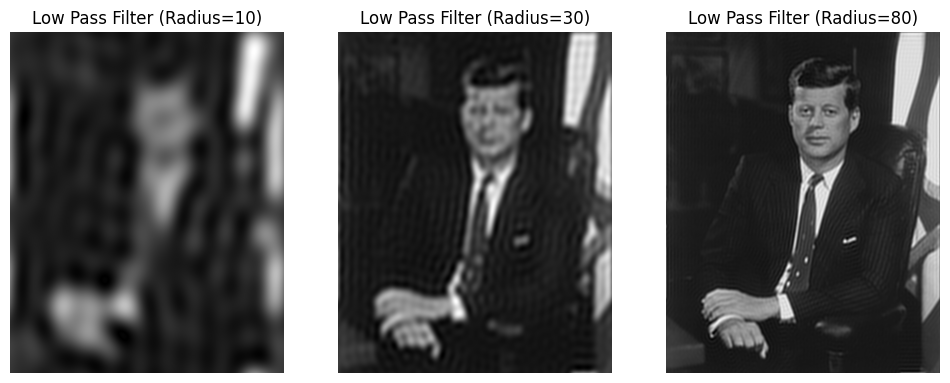

In [13]:
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
#10
radius1 = 10
mask_lpf = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf, (ccol, crow), radius1, 1, -1)
f_lpf = fshift * mask_lpf
ishift_lpf = np.fft.ifftshift(f_lpf)
img_back_lpf_1 = np.fft.ifft2(ishift_lpf)
img_back_lpf_1 = np.abs(img_back_lpf_1)
#30
radius2 = 30
mask_lpf = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf, (ccol, crow), radius2, 1, -1)
f_lpf = fshift * mask_lpf
ishift_lpf = np.fft.ifftshift(f_lpf)
img_back_lpf_2 = np.fft.ifft2(ishift_lpf)
img_back_lpf_2 = np.abs(img_back_lpf_2)
#80
radius3 = 80
mask_lpf = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf, (ccol, crow), radius3, 1, -1)
f_lpf = fshift * mask_lpf
ishift_lpf = np.fft.ifftshift(f_lpf)
img_back_lpf_3 = np.fft.ifft2(ishift_lpf)
img_back_lpf_3 = np.abs(img_back_lpf_3)

plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.imshow(img_back_lpf_1, cmap='gray')
plt.title(f'Low Pass Filter (Radius={radius1})')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_back_lpf_2, cmap='gray')
plt.title(f'Low Pass Filter (Radius={radius2})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back_lpf_3, cmap='gray')
plt.title(f'Low Pass Filter (Radius={radius3})')
plt.axis('off')
#by smaller radius only the super-low frequencies pass and all the high-frequency data that defines sharpness and edges are blocked.

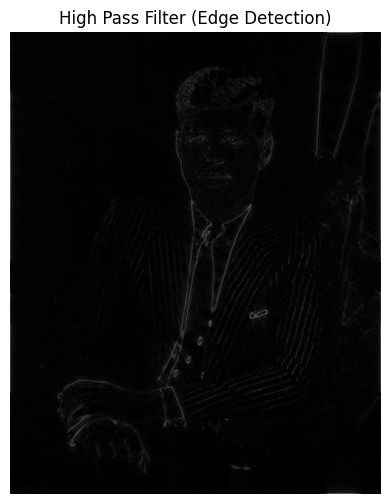

In [14]:
mask_hpf = 1 - mask_lpf
f_hpf = fshift * mask_hpf
ishift_hpf = np.fft.ifftshift(f_hpf)
img_back_hpf = np.fft.ifft2(ishift_hpf)
img_back_hpf = np.abs(img_back_hpf)
plt.figure(figsize=(6,6))
plt.imshow(img_back_hpf, cmap='gray')
plt.title('High Pass Filter (Edge Detection)')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1283.5), np.float64(1599.5), np.float64(-0.5))

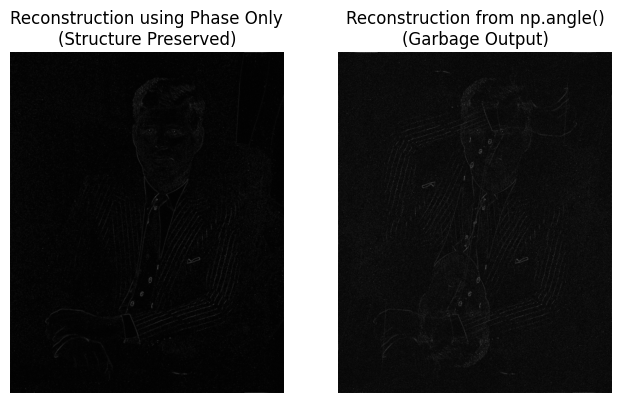

In [18]:
phase_only_complex = fshift / np.abs(fshift)
ishift_phase = np.fft.ifftshift(phase_only_complex)
img_phase = np.fft.ifft2(ishift_phase)
img_phase = np.abs(img_phase)
angle_values = np.angle(fshift)
ishift_angle_raw = np.fft.ifftshift(angle_values)
img_angle_raw = np.fft.ifft2(ishift_angle_raw)
img_angle_raw = np.abs(img_angle_raw)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_phase, cmap='gray')
plt.title('Reconstruction using Phase Only\n(Structure Preserved)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_angle_raw, cmap='gray')
plt.title('Reconstruction from np.angle()\n(Garbage Output)')
plt.axis('off')
# Difference between fshift / np.abs(fshift) and np.angle(fshift):
# fshift / np.abs(fshift) returns a COMPLEX number with length 1 (e^jθ).
# This preserves the mathematical format needed for the Inverse FFT.
# np.angle(fshift) returns a simple FLOAT value (the angle θ in radians).
# If we feed this float into ifft2, the computer thinks these angles are actually
# pixel intensity values, not phase info, leading to a garbage result.

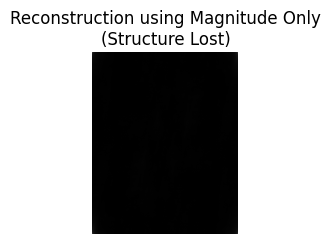

In [20]:
mag_only = np.abs(fshift)
ishift_mag = np.fft.ifftshift(mag_only)
img_mag = np.fft.ifft2(ishift_mag)
img_mag = np.abs(img_mag)
plt.subplot(1, 3, 3)
plt.imshow(img_mag, cmap='gray')
plt.title('Reconstruction using Magnitude Only\n(Structure Lost)')
plt.axis('off')
plt.show()
# Role of Logarithm:
# The magnitude spectrum usually shown in tutorials uses '20*log()' because
# the range of values is massive (e.g., 0 to 1,000,000). The log compresses this
# so we can see details with our eyes.
# Why it looks different:
# The image below is not a spectrum; it is the spatial reconstruction without phase.
# Phase contains the "where" information (edges, shapes).
# Magnitude contains the "how much" information (energy/brightness).
# Without phase, the pixels don't know where to go, so they cluster or disperse
# symmetrically, losing all structural definition.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

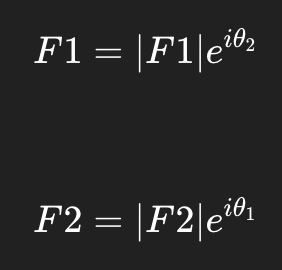

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.